In [1]:
! wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
! tar xfz aclImdb_v1.tar.gz

--2021-11-19 22:09:24--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  28.3MB/s    in 2.8s    

2021-11-19 22:09:27 (28.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
with open('aclImdb/imdb.vocab') as f:
    vocabulary = [word.rstrip() for word in f]
    vocabulary = vocabulary[:15000] # keeping most frequent 15k to save memory
    print('%d words in vocabulary' % (len(vocabulary),))

15000 words in vocabulary


In [3]:
import re 
import nltk 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
#Generating Tokens
def generate_tokens(text):
    text = text.lower()
    text = re.sub("\\s", " ", text) 
    text = re.sub("[^a-z' ]", "", text) 
    token_words = word_tokenize(text)
    tokens = []
    for i in token_words:
        if i not in stop_words:
            tokens.append(i)

    tokens_last=[]

    # Lemmatization 
    lemmatizer = WordNetLemmatizer()
    for j in tokens:
      tokens_last.append(lemmatizer.lemmatize(j))

    print("Final Tokens Output: ")
    print(tokens_last)

    return tokens

In [5]:
#Loading the dataset
import os
def load_dataset(dirname):
    x, y = [], []
    
    for yvalue, ylabel in enumerate(['neg', 'pos']):
        ydirectory = os.path.join(dirname, ylabel)
        for filename in os.listdir(ydirectory):
            filepath = os.path.join(ydirectory, filename)
            with open(filepath) as f:
                tokens = generate_tokens(f.read())
            x.append(tokens)
            y.append(yvalue)
    print()
    return x, y

In [6]:
x_train, y_train = load_dataset('aclImdb/train/')

Streaming output truncated to the last 5000 lines.
['india', "'s", 'sunny', "'clime", 'use', 'spend', 'time', 'soldier', 'service', 'majesty', 'queen', 'go', 'famous', 'poem', 'penned', 'rudyard', 'kipling', 'literal', 'foundation', 'upon', 'movie', 'gunga', 'din', 'based', 'fortunate', 'enough', 'watch', 'legendary', 'classic', 'enjoy', 'film', 'way', 'use', 'make', 'sheer', 'pleasure', 'taken', 'script', 'established', 'novelist', 'poet', 'story', 'humble', 'indian', 'native', 'named', 'gunga', 'din', 'sam', 'jaffe', 'work', "'a", 'regimental', 'beasty', "'", 'british', 'occupation', 'india', 'th', 'century', 'greatest', 'wish', 'become', 'soldier', 'water', 'boy', 'part', 'british', 'calvary', 'contingent', 'threatened', 'death', 'notorious', 'blood', 'cult', 'kali', 'called', "'thuggee", "'", 'three', 'particular', 'soldier', 'stand', 'company', 'noted', 'bravery', 'comradeship', 'first', 'handsome', 'debonair', 'cary', 'grant', 'playing', 'sgt', 'archibald', 'cutter', 'next', 'vic

In [7]:
sample_text = "The story centers around Barry McKenzie who must go to England if he wishes to claim his inheritance. Being about the grossest Aussie shearer ever to set foot outside this great Nation of ours there is something of a culture clash and much fun and games ensue. The songs of Barry McKenzie(Barry Crocker) are highlights."

tkns=generate_tokens(sample_text)
print(tkns)

Final Tokens Output: 
['story', 'center', 'around', 'barry', 'mckenzie', 'must', 'go', 'england', 'wish', 'claim', 'inheritance', 'grossest', 'aussie', 'shearer', 'ever', 'set', 'foot', 'outside', 'great', 'nation', 'something', 'culture', 'clash', 'much', 'fun', 'game', 'ensue', 'song', 'barry', 'mckenziebarry', 'crocker', 'highlight']
['story', 'centers', 'around', 'barry', 'mckenzie', 'must', 'go', 'england', 'wishes', 'claim', 'inheritance', 'grossest', 'aussie', 'shearer', 'ever', 'set', 'foot', 'outside', 'great', 'nation', 'something', 'culture', 'clash', 'much', 'fun', 'games', 'ensue', 'songs', 'barry', 'mckenziebarry', 'crocker', 'highlights']


In [8]:
X_train, y_train = load_dataset('aclImdb/train/')

X_test, y_test = load_dataset('aclImdb/test/')

Streaming output truncated to the last 5000 lines.
['thing', 'ali', 'g', 'take', 'mick', 'character', 'br', 'br', 'humour', 'much', "'like", 'love', "'", 'brand', 'totally', 'politically', 'incorrect', 'irreverent', 'self', 'effacing', 'typebr', 'br', 'personally', 'totally', 'love', 'film', 'everyone', 'met', 'seen', 'watch', 'several', 'time', 'pick', 'new', 'gag', 'time', 'humour', 'aural', 'visual', 'timing', 'impeccable', 'humour', 'probably', 'english', 'specifically', 'london', 'possible', 'nonenglish', 'viewer', 'may', 'get', 'humour', 'think', 'teenager', 'love', 'especially', 'like', 'kevin', 'perry', 'go', 'large', 'tickled']
Final Tokens Output: 
['really', 'enjoyed', 'movie', 'dog', 'becomes', 'duke', 'would', 'easy', 'mess', 'one', 'along', 'humor', 'script', 'filled', 'warmth', 'even', 'profundity', 'nobility', 'class', "'s", 'feel', 'good', 'movie', 'whole', 'family', 'watch', 'even', 'adult']
Final Tokens Output: 
["'s", 'child', 'truly', 'enjoyed', 'show', 'proudly', 

In [9]:
#training data length
len(X_train), len(y_train)

(25000, 25000)

In [10]:
#testing data length
len(X_test), len(y_test)

(25000, 25000)

In [11]:
def bow_onehot_vector(tokens):
    vector = [0] * len(vocabulary)
    for t in tokens:
        try:
            vector[vocabulary.index(t)] = 1
        except:
            pass  # ignore missing words
    return vector

In [12]:
from tqdm import tqdm #progress bar

X_bow_train = [bow_onehot_vector(x) for x in tqdm(X_train)]
X_bow_val = [bow_onehot_vector(x) for x in tqdm(X_test)]

100%|██████████| 25000/25000 [03:46<00:00, 110.38it/s]


### LSTM

In [13]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [14]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [15]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000

In [16]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

17473536/17464789 [==============================] - 0s 0us/step


In [17]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
391/391 [==============================] - 223s 564ms/step - loss: 0.4580 - accuracy: 0.7802
Epoch 2/10
391/391 [==============================] - 221s 564ms/step - loss: 0.3044 - accuracy: 0.8788
Epoch 3/10
391/391 [==============================] - 220s 564ms/step - loss: 0.2623 - accuracy: 0.89

In [19]:
# Final evaluation of the model
scores1 = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: %.2f%%" % (scores1[1]*100))

scores2 = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (scores2[1]*100))

Training Accuracy: 96.91%
Testing Accuracy: 86.62%


### LSTM with CNN

In [20]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [21]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [22]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [23]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [24]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 250, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                      

In [25]:
# Final evaluation of the model
scores1 = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: %.2f%%" % (scores1[1]*100))

scores2 = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (scores2[1]*100))

Training Accuracy: 99.04%
Testing Accuracy: 87.28%


### LSTM with Dropout

In [26]:
# LSTM with dropout for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [27]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [28]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [29]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [30]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=64)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
391/391 [==============================] - 471s 1s/step - loss: 0.4709 - accuracy: 0.7727
Epoch 2/10
391/391 [==============================] - 464s 1s/step - loss: 0.3160 - accuracy: 0.8730
Epoch 3/10
391/391 [==============================] - 464s 1s/step - loss: 0.6055 - accuracy: 0.7107
Epoc

In [31]:
# Final evaluation of the model
scores1 = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: %.2f%%" % (scores1[1]*100))

scores2 = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (scores2[1]*100))

Training Accuracy: 95.23%
Testing Accuracy: 87.32%


### GRU

In [32]:
# model initialization

import tensorflow as tf
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

vocabSize = 5000
embedding_dim = 100
max_length = 500
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabSize, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# model summary
print(model.summary())

# fit model
model.fit(X_train, y_train, epochs=10, verbose=2, validation_split=0.33)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 100)          500000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              63744     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 24)                3096      
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 566,865
Trainable params: 566,865
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
524/524 - 337s - loss: 0.5077 - accuracy: 0.7413 - val_loss: 0.3698 - val_accuracy: 0.8401 - 337s/

In [33]:
# Final evaluation of the model
scores1 = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: %.2f%%" % (scores1[1]*100))

scores2 = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (scores2[1]*100))

Training Accuracy: 95.29%
Testing Accuracy: 86.87%


### Visualize Results

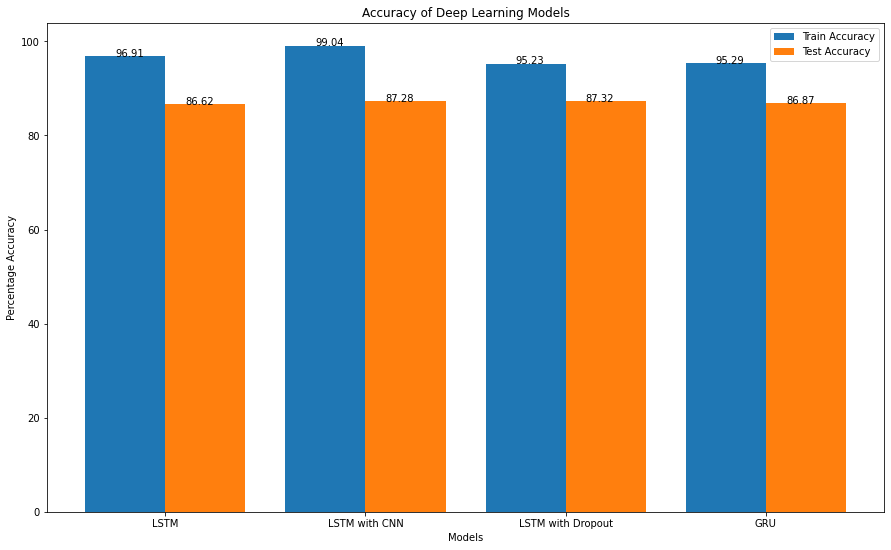

In [60]:
import numpy as np
import matplotlib.pyplot as plt


X = ['LSTM','LSTM with CNN','LSTM with Dropout','GRU']
X_Train = [96.91, 99.04, 95.23, 95.29]
X_Test = [86.62, 87.28, 87.32, 86.87]

X_axis = np.arange(len(X))
plt.figure(figsize=(15,9))
plt.bar(X_axis - 0.2, X_Train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, X_Test, 0.4, label = 'Test Accuracy')
for i in range(len(X_Train)):
        plt.text(i-0.25,X_Train[i],round(X_Train[i],2))
        
for i in range(len(X_Test)):
        plt.text(i+0.10,X_Test[i],round(X_Test[i],2))

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Percentage Accuracy")
plt.title("Accuracy of Deep Learning Models")
plt.legend()
plt.show()